In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt

from Experiment import Experiment
from figure_functions import get_plot_options

In [2]:
# Get full_params and half_params plot option dictionaries:
full_params, half_params = get_plot_options()

# Set up boxplot-specific options
boxplot_params={'boxplot.boxprops.linewidth': 0.5,
                'boxplot.whiskerprops.linewidth': 0.5,
                'boxplot.capprops.linewidth': 0.5,
                'boxplot.medianprops.linewidth' : 0.5,
               }

# Set up the options for this plot:
plot_params = full_params.copy()
plot_params.update(boxplot_params)
plot_params['axes.linewidth'] = 0.6

# Reset and set plot settings:
plt.rcdefaults()
plt.rcParams.update(plot_params)

In [3]:
all_v = np.load('./results/Appendix-100Experiments/S0-all_v.npy')
all_f = np.load('./results/Appendix-100Experiments/S0-all_f.npy')

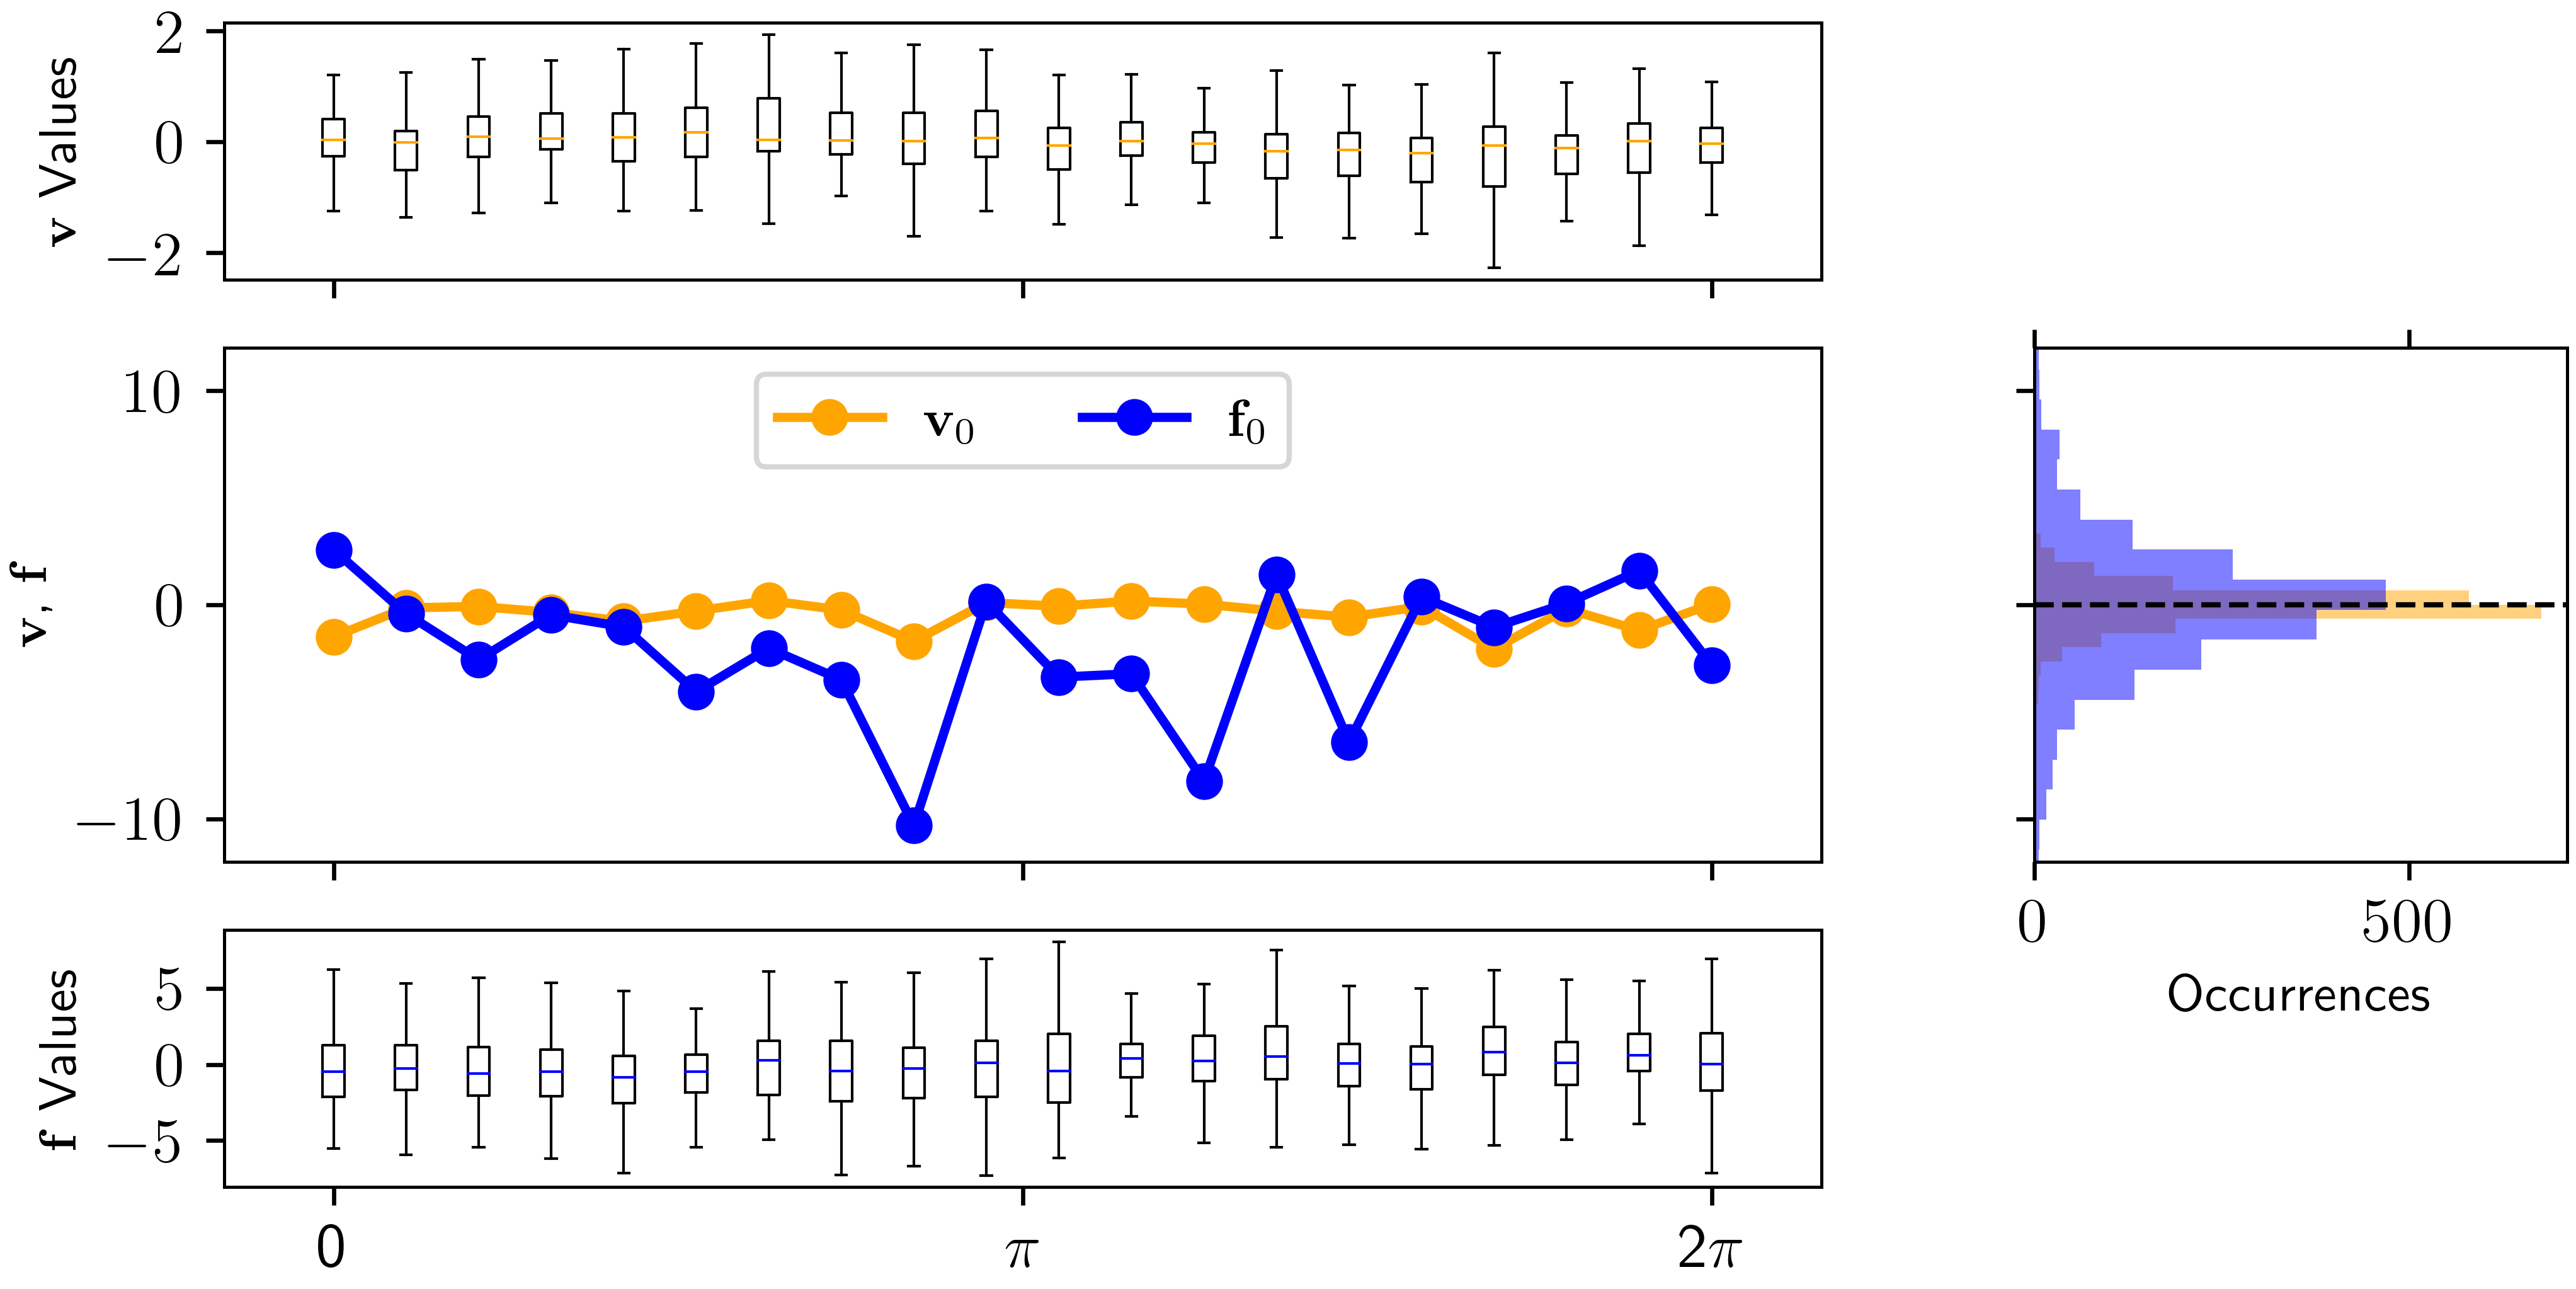

In [4]:
x = np.linspace(0, 2*np.pi, all_v.shape[1])


#gridspec=mpl.gridspec.GridSpec(3,1,)
grid ={'height_ratios':[1,2,1], 'width_ratios':[3,1]}
fig, [ax1, ax2, ax3] = plt.subplots(3,2, sharex='col', sharey='row', figsize=(8,4), gridspec_kw=grid)

# Turn off top and bottom right axes
ax1[1].set_visible(False)
ax3[1].set_visible(False)

# the F boxplots
ax1[0].boxplot(all_v,
            positions=x,
            medianprops={'color': 'orange'},
            showfliers=False,
            widths=0.1)
ax1[0].set_ylabel(r"$\mathbf{v}$ Values")

# Plot a few vectors
marker = 'o'
idx=0
ax2[0].plot(x, all_v[idx,:], color='orange', marker=marker)
ax2[0].plot(x, all_f[idx,:], color='blue', marker=marker)
ax2[0].set_ylabel(r"$\mathbf{v}$, $\mathbf{f}$")
ax2[0].legend([r"$\mathbf{v}_0$", r"$\mathbf{f}_0$"], ncol=2, loc='upper center')

# the V plots
ax3[0].boxplot(all_f,
            positions=x,
            medianprops={'color': 'blue'},
            showfliers=False,
            widths=0.1)
ax3[0].set_ylabel(r"$\mathbf{f}$ Values")

ax3[0].set_xticks([0, np.pi, 2*np.pi])
ax3[0].set_xticklabels(["0", r"$\pi$", r"2$\pi$"])

# Plot full histo on right
bins=25
ax2[1].hist(all_v.flatten(), bins=bins, color='orange', orientation="horizontal", alpha=0.5)
ax2[1].hist(all_f.flatten(), bins=bins, color='blue', orientation="horizontal", alpha=0.5)
ax2[1].axhline(0, linestyle='--', color='k', linewidth=1)
ax2[1].tick_params('x', reset=True)
ax2[1].set_xlabel('Occurrences')
ax2[0].set_ylim([-12,12])

plt.savefig('./Figures/Fig16-Latent100Statistics')
plt.show()